# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Ghazal 🖊  
* **Last Name** : Mousavi📝  
* **SID** : 810002006 🆔

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, auc, accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [2]:
path = "data/hotels_in_europe.csv"
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


In [4]:
def bar_plot(df, feature, fig_size, color):
  fig, ax = plt.subplots(figsize=fig_size)

  df[feature].value_counts().plot.bar(color=color, ax=ax)

  for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{int(bar.get_height())}',
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

  plt.title(feature.title(), fontweight='bold', fontsize=16)
  plt.xlabel("Type", fontsize=12, fontweight='bold')
  plt.ylabel("Count", fontsize=12, fontweight='bold')
  plt.xticks(rotation=45, ha="right")
  plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
  plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

  plt.show()

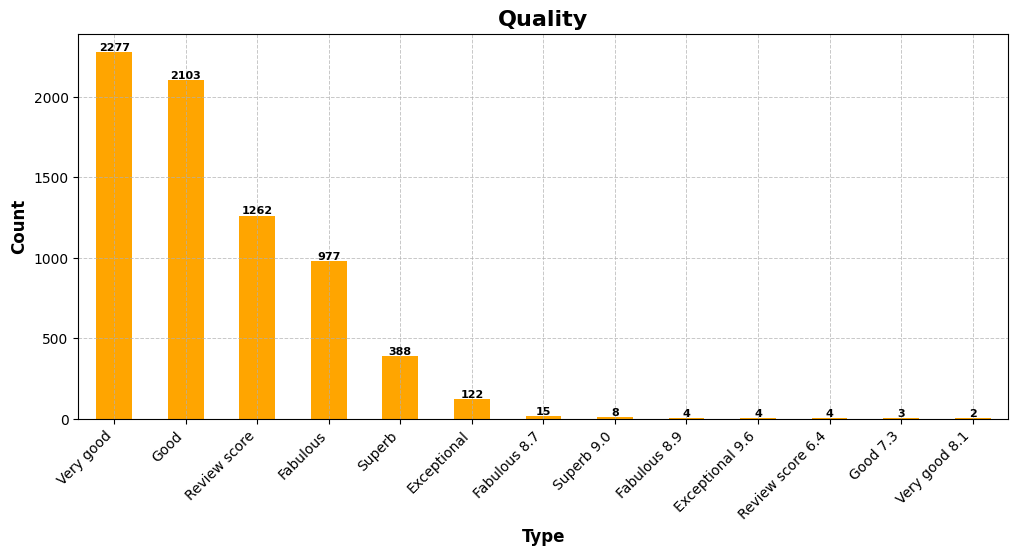

In [5]:
bar_plot(df, "quality", (12, 5), '#FFA500')

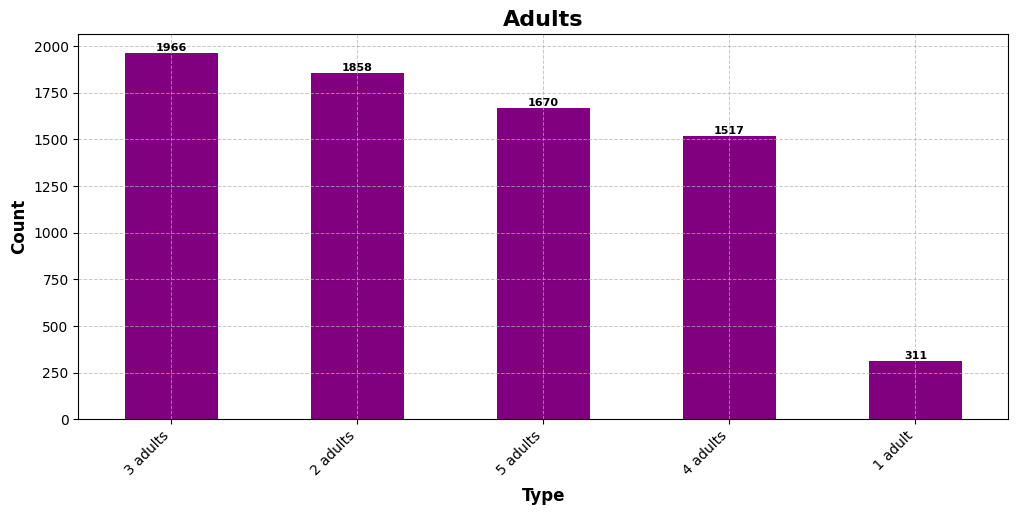

In [6]:
bar_plot(df, "adults", (12, 5), '#800080')

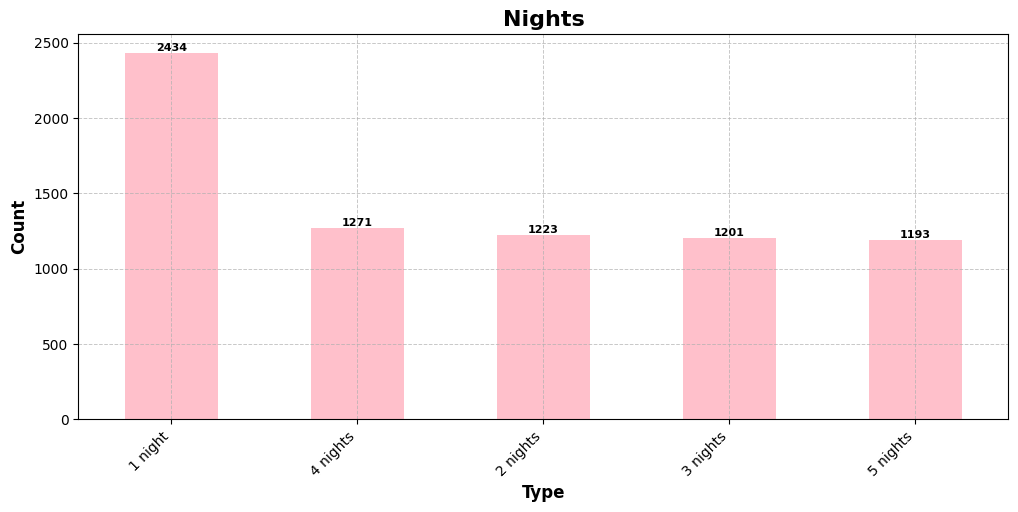

In [7]:
bar_plot(df, "nights", (12, 5), '#FFC0CB')

### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄

In [4]:
def data_preprocessing(df):

  df['price'] = df['price'].str.replace(r'[^\d,]', '', regex=True)

  df['price'] = df['price'].str.replace(',', '').astype(float)

  df['review'] = df['review'].str.replace(r'[^\d,]', '', regex=True)

  df['review'] = df['review'].str.replace(',', '').astype(float)

  df['review'] = df['review'].fillna(df['review'].mean())

  df['size'] = df['size'].str.extract(r'(\d+)')

  df['size'] = pd.to_numeric(df['size'], errors='coerce')

  df['size'] = df['size'].fillna(df['size'].median())
  df['free_cancellation'] = df['free_cancellation'].fillna(0)
  df['free_cancellation'] = df['free_cancellation'].apply(lambda x: 1 if x != 0 else 0)


  df['nights'] = df['nights'].str.extract(r'(\d+)').astype(int)

  df['adults'] = df['adults'].str.extract(r'(\d+)').astype(int)

  df['rating'] = df['rating'].fillna(df['review'].mean())

  df['quality'] = df['quality'].fillna(df['quality'].mode()[0])

  df['bed'] = df['bed'].fillna(df['bed'].mode()[0])

  quality_mapping = {'Exceptional 9.6': 13, 'Exceptional': 12, 'Superb 9.0': 11, 'Superb':10, 'Fabulous 8.9': 9, 'Fabulous 8.7': 8, 'Fabulous': 7,'Very good 8.1': 6 ,'Very good': 5, 'Good 7.3': 4, 'Good': 3, 'Review score 6.4': 2, 'Review score': 1}

  df['quality_numeric'] = df['quality'].map(quality_mapping)

  df['rating_per_review'] = df['rating']/df['review']

  return df


In [5]:
df = data_preprocessing(df)
df.head()

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation,quality_numeric,rating_per_review
0,WIT Hotel,"9th arr., Paris",7951542.0,7.1,Good,3300.0,1 double bed,20.0,1.9,Suite,1,1,0,3,0.002152
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677.0,8.0,Very good,5921.0,1 single bed,48.0,4.6,Single Bed in 6-Bed Dormitory Room,1,1,0,5,0.001351
2,Timhotel Montmartre,"18th arr., Paris",7569083.0,8.3,Very good,2532.0,1 single bed,48.0,3.4,Comfort Single Room,1,1,0,5,0.003278
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737.0,8.6,Fabulous,1457.0,1 large double bed,48.0,4.2,Classic Room,1,1,0,7,0.005903
4,Hôtel Le Daum,"12th arr., Paris",7913496.0,8.3,Very good,1273.0,1 double bed,48.0,4.1,Comfort Double Room,1,1,0,5,0.006520


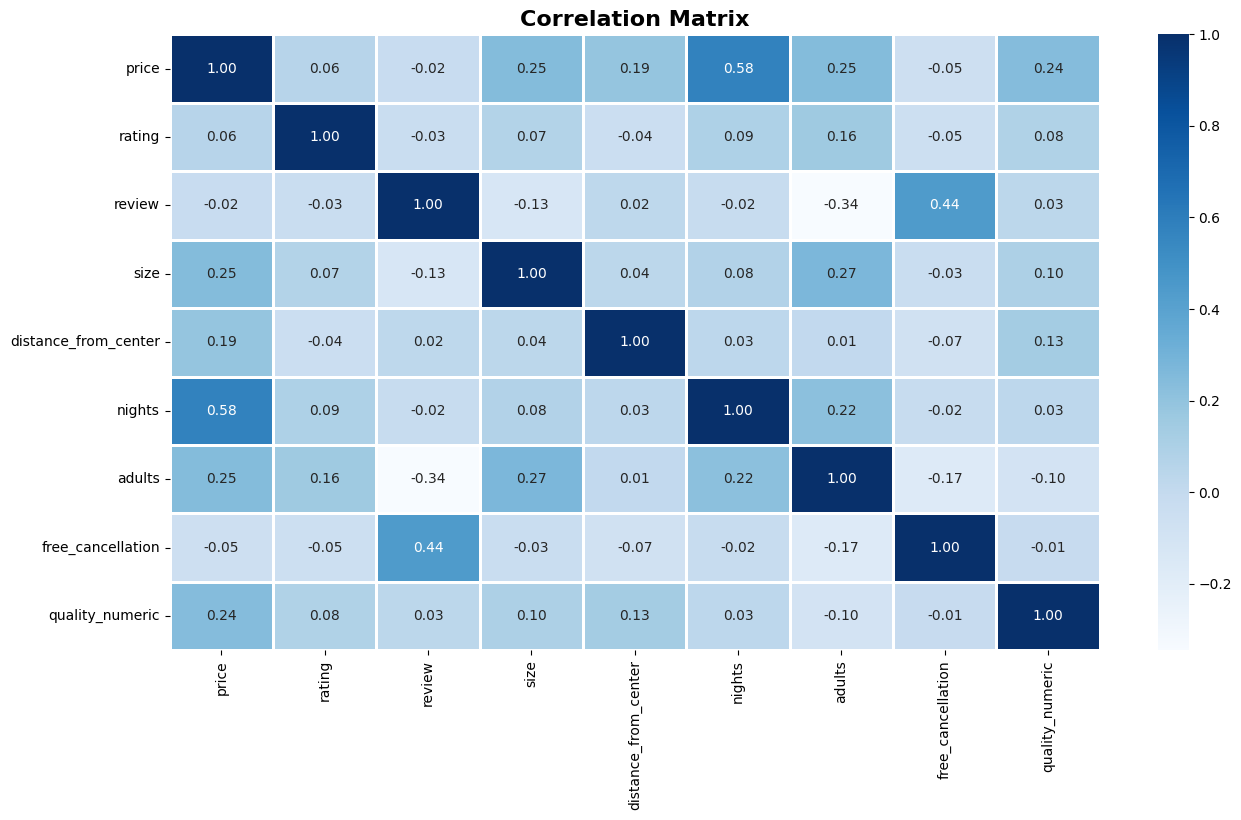

In [6]:
plt.figure(figsize=(15, 8))
df_selected = df.select_dtypes(include=['number']).drop("rating_per_review", axis=1)
sns.heatmap(df_selected.corr(), cmap='Blues', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Matrix', fontweight='bold', fontsize=16)
plt.show()


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

<Figure size 2000x800 with 0 Axes>

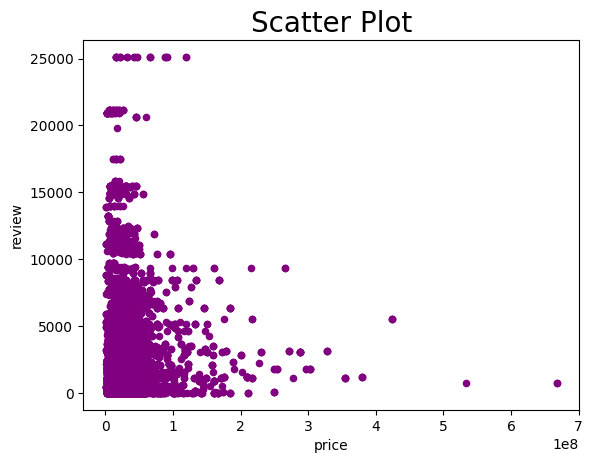

In [11]:
plt.figure(figsize=(20, 8))
df.plot(x="price", y="review", kind="scatter", color="purple")
plt.title("Scatter Plot", fontsize=20)
plt.show()

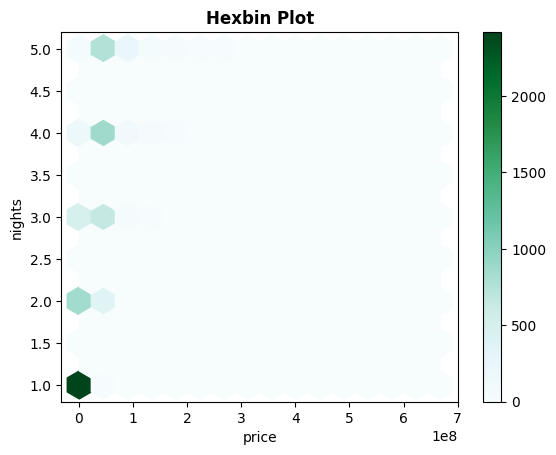

In [12]:
df.plot.hexbin(x='price', y='nights', gridsize=15)
plt.title("Hexbin Plot", fontweight='bold')
plt.show()

### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [7]:
def assign_label(df, column):
  df['target'] = (df[column] >  df[column].median()).astype(int)
  return df

df = assign_label(df, "price")
df['target'].value_counts()

,count
target,
0,3663
1,3659


In [8]:
df["rating_per_review"].value_counts()

,count
rating_per_review,
1.000000,178
0.001454,69
0.000518,51
0.003956,50
0.002202,47
...,...
0.001518,1
0.004891,1
0.318182,1


In [51]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)

  metrics = {
      "Average Type": ["Macro", "Micro", "Weighted"],
      "Precision": [
          precision_score(y_test, y_pred, average='macro'),
          precision_score(y_test, y_pred, average='micro'),
          precision_score(y_test, y_pred, average='weighted')
      ],
      "Recall": [
          recall_score(y_test, y_pred, average='macro'),
          recall_score(y_test, y_pred, average='micro'),
          recall_score(y_test, y_pred, average='weighted')
      ],
      "F1 Score": [
          f1_score(y_test, y_pred, average='macro'),
          f1_score(y_test, y_pred, average='micro'),
          f1_score(y_test, y_pred, average='weighted')
      ],

      "Accuracy": accuracy_score(y_test, y_pred)

  }

  print(pd.DataFrame(metrics).to_string(index=False))
  print('-------------------------------------------------------')

  cm = confusion_matrix(y_test, y_pred)

  fig = plt.subplots(1, figsize=(8, 5))

  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')


  plt.tight_layout()
  plt.show()

  return metrics

.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [59]:
features = ['rating_per_review', 'quality_numeric', 'size', 'nights', 'distance_from_center', 'adults']
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 5857
Test size: 1465


In [61]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [62]:
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.832421 0.826575  0.826395  0.827304
       Micro   0.827304 0.827304  0.827304  0.827304
    Weighted   0.831975 0.827304  0.826541  0.827304
-------------------------------------------------------


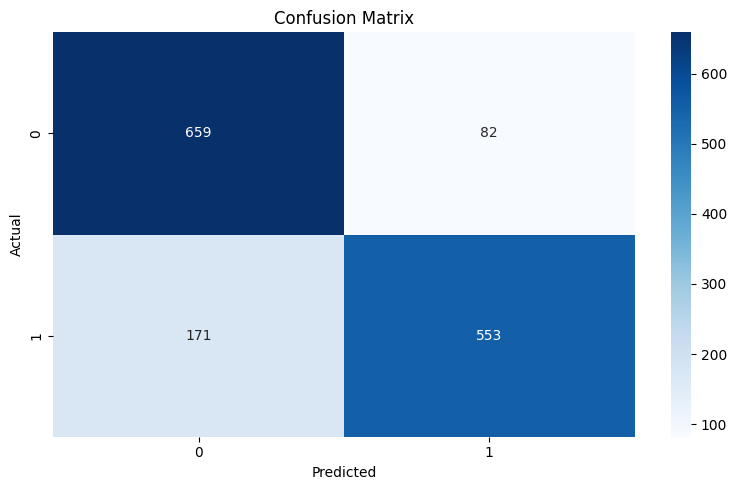

In [52]:
# Code Here
naive_bayes_model = GaussianNB()
naive_bayes_model = naive_bayes_model.fit(X_train, y_train)
naive_bayes_metrics = evaluate_model(naive_bayes_model, X_test, y_test)

#### 🌳 Decision Tree Classifier

Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.980885 0.980885  0.980885  0.980887
       Micro   0.980887 0.980887  0.980887  0.980887
    Weighted   0.980887 0.980887  0.980887  0.980887
-------------------------------------------------------


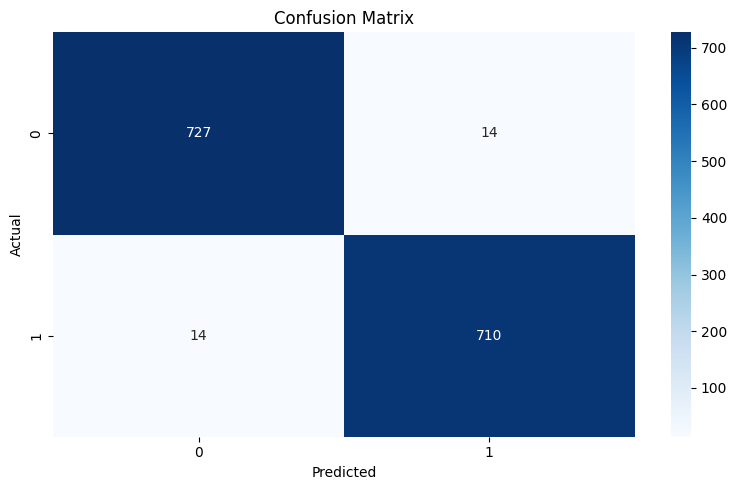

In [54]:
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(X_train, y_train)
decision_tree_metrics = evaluate_model(decision_tree_model, X_test, y_test)

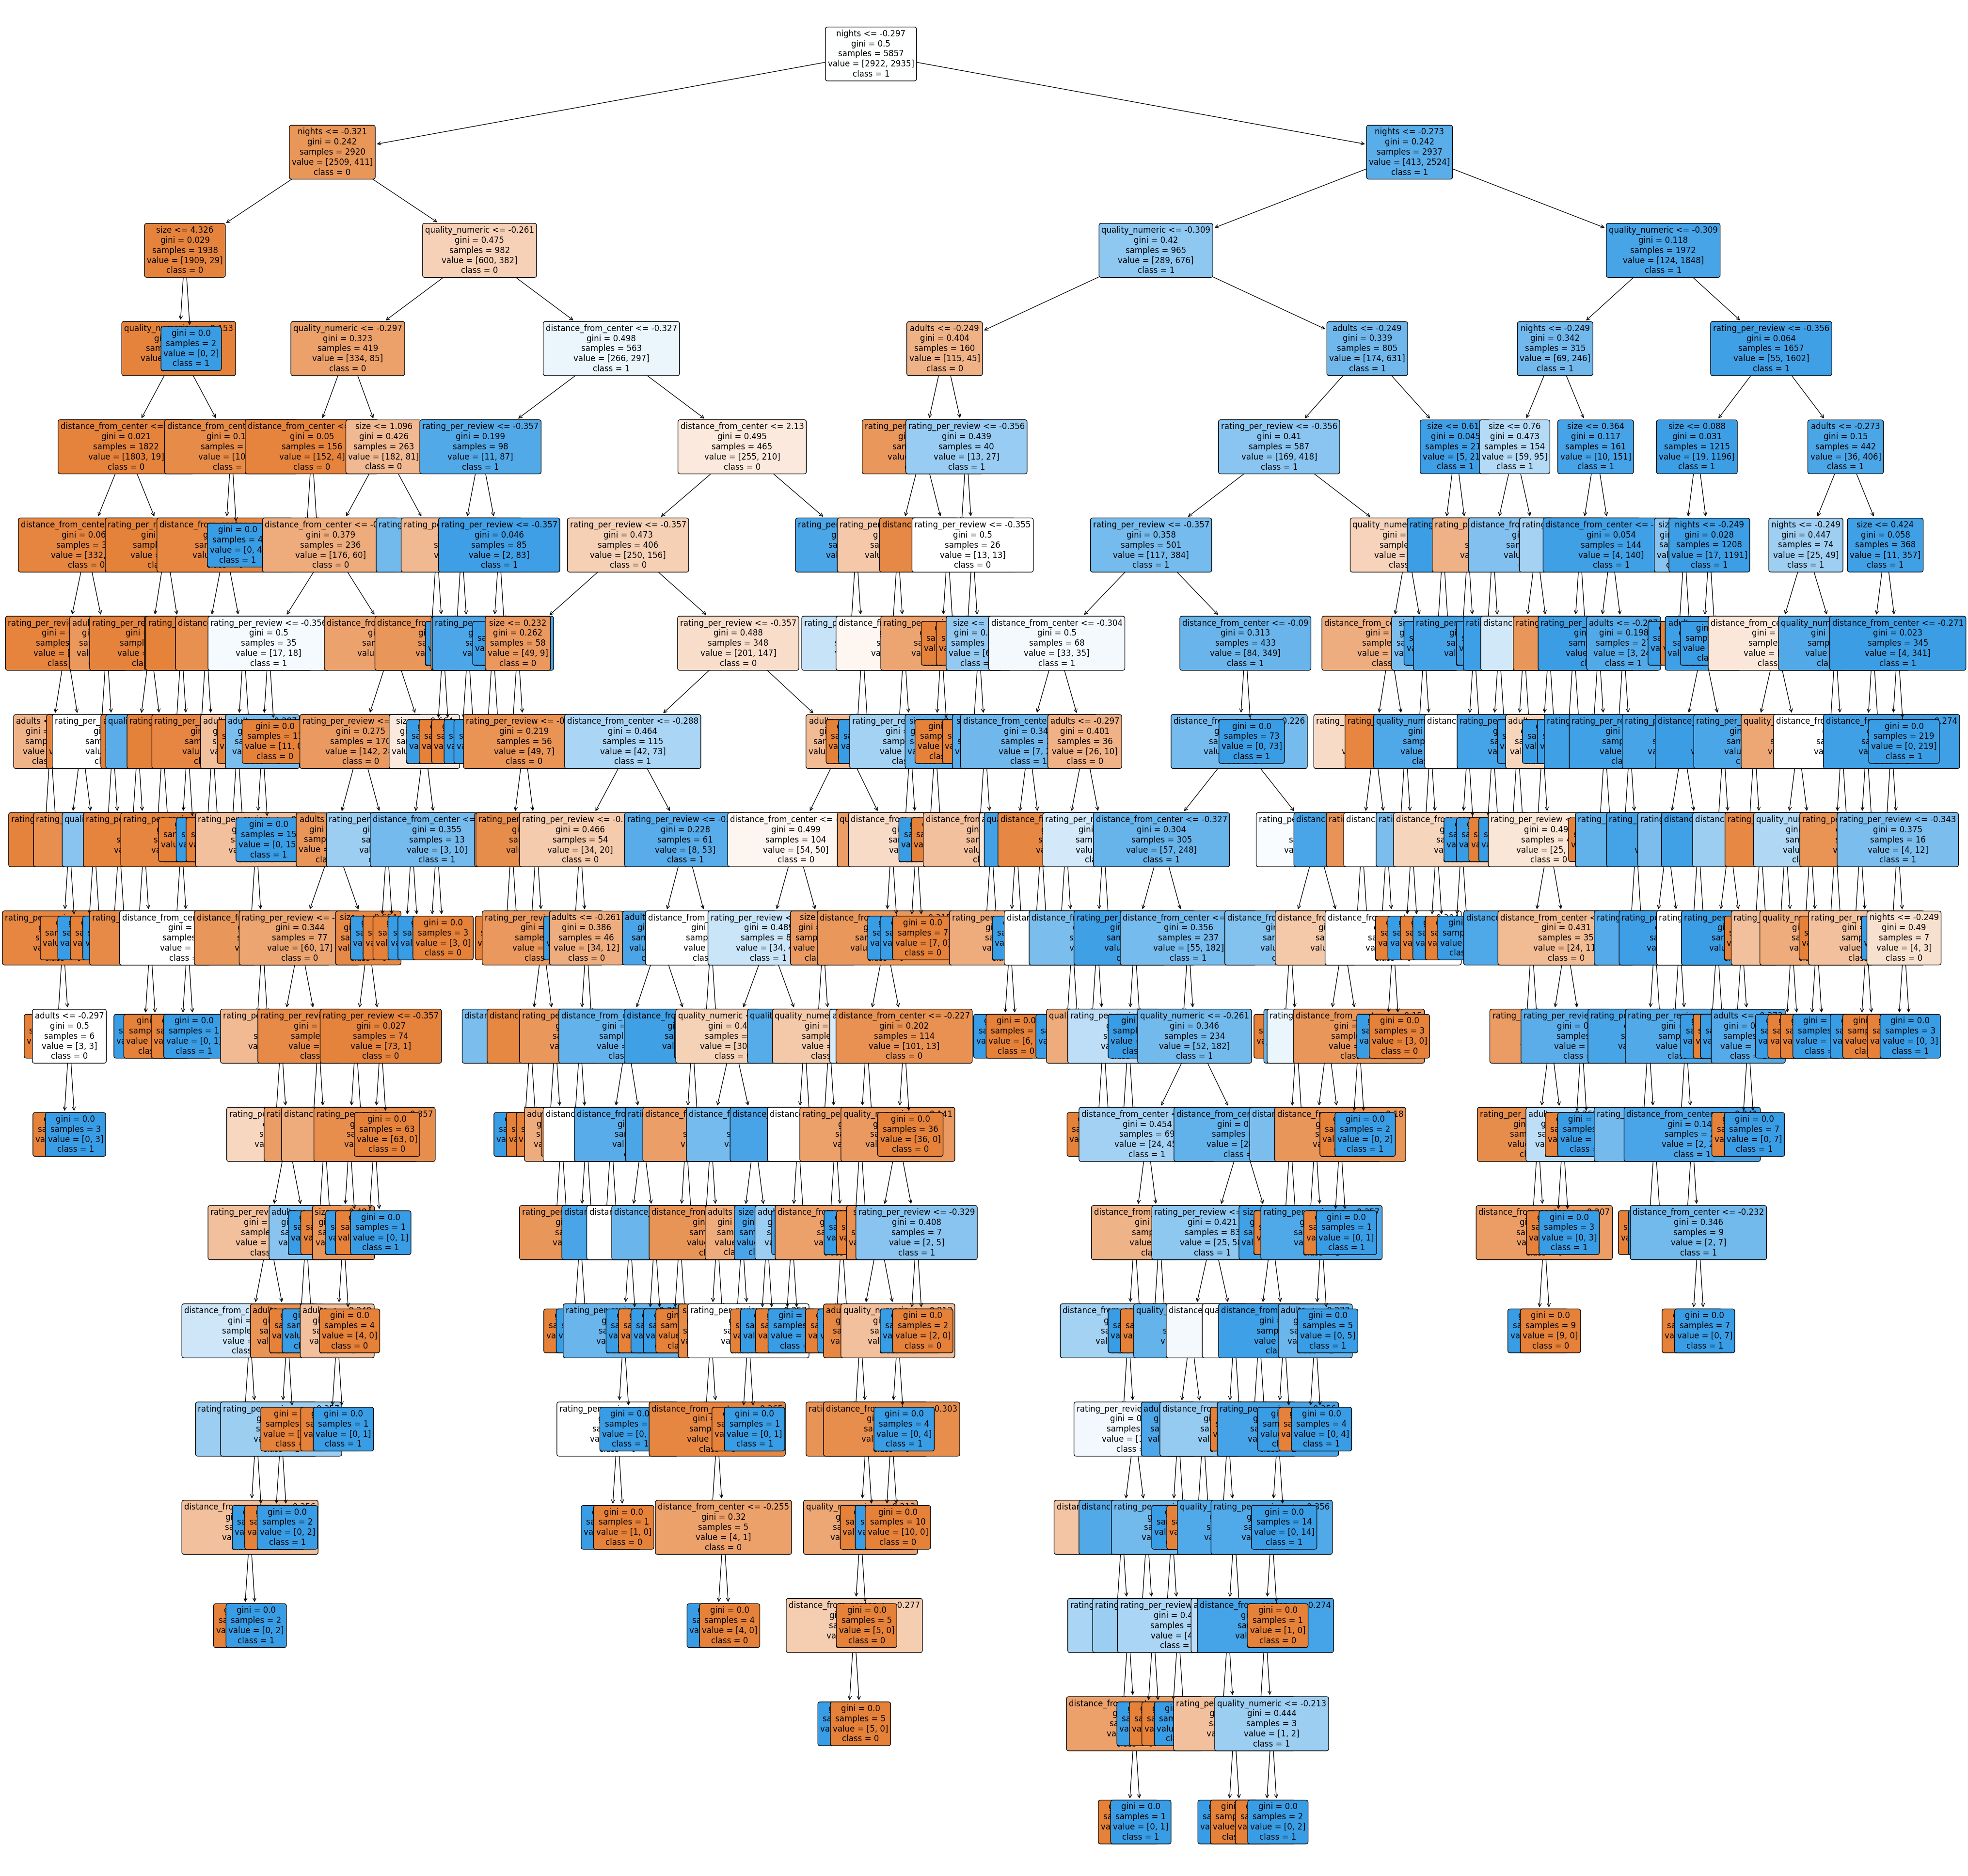

In [60]:
plt.figure(figsize=(50, 50))

tree.plot_tree(decision_tree_model, feature_names=X_train.columns,
    class_names=decision_tree_model.classes_.astype(str),
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

#### 🌲🌳 Random Forest Classifier

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.988388 0.988402  0.988395  0.988396
       Micro   0.988396 0.988396  0.988396  0.988396
    Weighted   0.988397 0.988396  0.988396  0.988396
-------------------------------------------------------


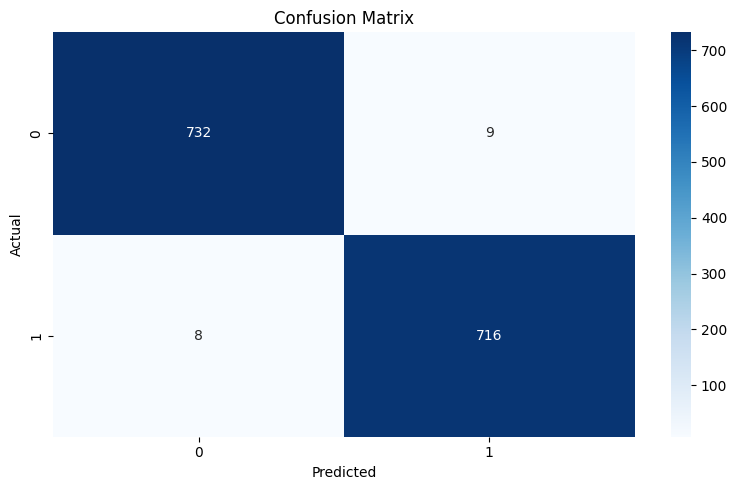

In [57]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=10)],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_forest_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_random_forest_model = random_search.best_estimator_
random_forest_metrics = evaluate_model(best_random_forest_model, X_test, y_test)


#### ⚡️ Adaptive Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.918761 0.918816  0.918768  0.918771
       Micro   0.918771 0.918771  0.918771  0.918771
    Weighted   0.918819 0.918771  0.918774  0.918771
-------------------------------------------------------


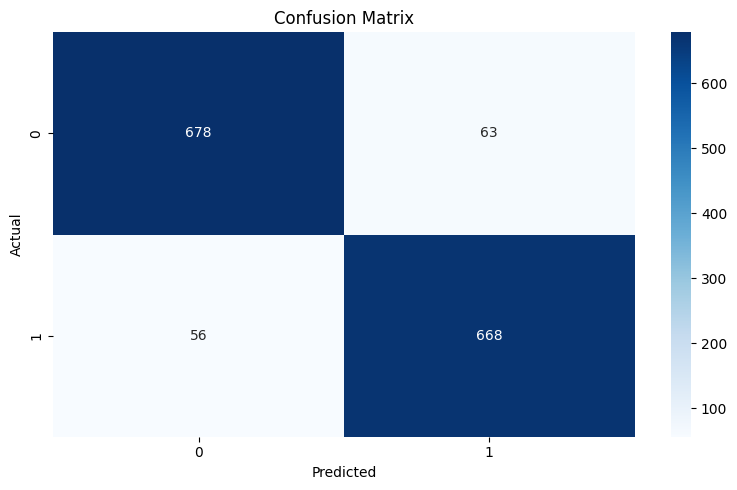

In [68]:
ada_boost_model = AdaBoostClassifier()
param_grid_1 = {
    'n_estimators': [5, 10, 50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME']
}

random_search = RandomizedSearchCV(
    estimator=ada_boost_model,
    param_distributions=param_grid_1,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_ada_boost_model = random_search.best_estimator_
ada_boost_metrics = evaluate_model(best_ada_boost_model, X_test, y_test)

Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.908778 0.908694  0.908531  0.908532
       Micro   0.908532 0.908532  0.908532  0.908532
    Weighted   0.908933 0.908532  0.908528  0.908532
-------------------------------------------------------


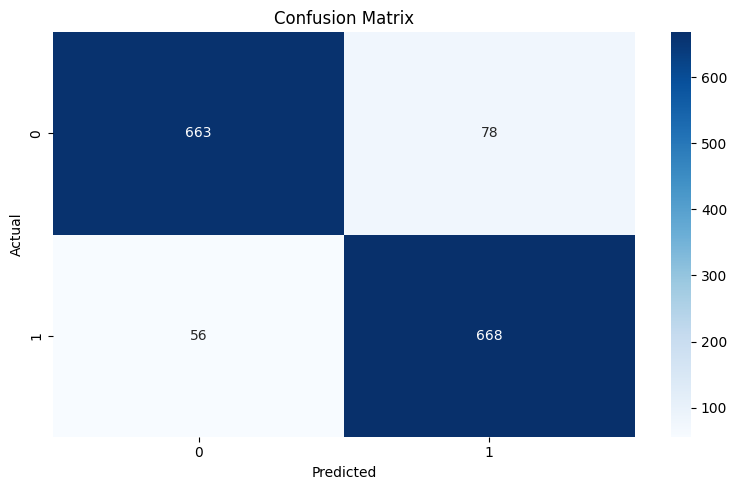

In [70]:
ada_boost_model_2 = AdaBoostClassifier(n_estimators=20)
ada_boost_model_2 = ada_boost_model_2.fit(X_train, y_train)
ada_boost_metrics_2 = evaluate_model(ada_boost_model_2, X_test, y_test)

Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.870043 0.865623  0.865716  0.866212
       Micro   0.866212 0.866212  0.866212  0.866212
    Weighted   0.869639 0.866212  0.865811  0.866212
-------------------------------------------------------


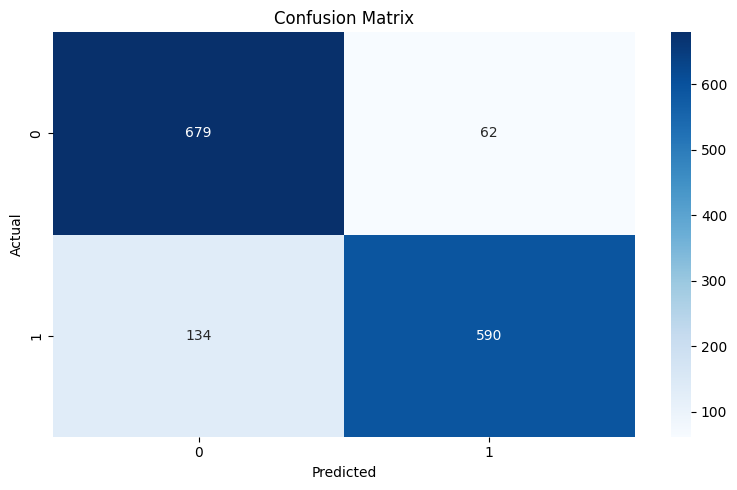

In [71]:
ada_boost_model_3 = AdaBoostClassifier(n_estimators=5)

ada_boost_model_3 = ada_boost_model_3.fit(X_train, y_train)
ada_boost_metrics_3 = evaluate_model(ada_boost_model_3, X_test, y_test)

#### ⚡️ XGBoost

In [12]:
pip install scikit-learn==1.0.2

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:55:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.01, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.929115 0.929127  0.929010   0.92901
       Micro   0.929010 0.929010  0.929010   0.92901
    Weighted   0.929233 0.929010  0.929011   0.92901
-------------------------------------------------------


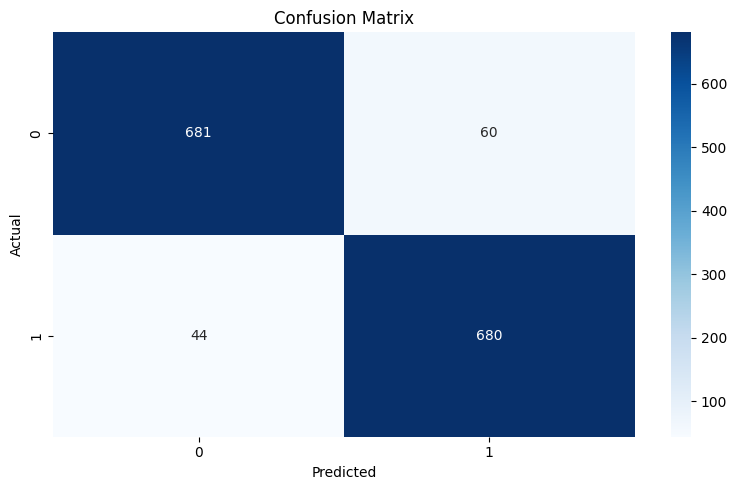

In [14]:
# Code Here

hyper_parameters = {"learning_rate": [0.01, 0.001, 0.0001],
                     "n_estimators": [50, 100, 150],
                     "min_samples_split": [2, 5, 10],
                     "min_samples_leaf": [1, 2, 4],
                     "max_depth": [None, 2, 4, 6],
                     "max_features": [None, 'sqrt', 'log2']
                    }

xgb_model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=hyper_parameters,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train.values, y_train)
print("Best Parameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
xgb_boost_metrics = evaluate_model(best_xgb_model, X_test, y_test)


### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [161]:
class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1 / n_samples) * np.ones(n_samples, dtype=float)

        for _ in range(self.n_estimators):
            learner =  GaussianNB()
            learner.fit(X, y, sample_weight=self.weights)
            pred = learner.predict(X)
            missClassified = pred != y
            error = np.sum(self.weights[np.where(missClassified)[0]]) / np.sum(self.weights)

            number_of_classes = len(np.unique(y))

            if error > 1 - (1 / number_of_classes):
                continue

            alpha = np.log((1 - error) / error) + np.log(number_of_classes-1)
            self.weights[np.where(missClassified)[0]] *= np.exp(alpha)

            self.weights /= np.sum(self.weights)

            self.learners.append(learner)
            self.learner_weights.append(alpha)

    def predict(self, X):

        weighted_votes = np.zeros((X.shape[0], len(np.unique(y_train))))
        predictionsOfLearners = []

        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X))

        for i in range(len(predictionsOfLearners)):
              for j, pred in enumerate(predictionsOfLearners[i]):
                  weighted_votes[j, pred] += self.learner_weights[i]

        return np.argmax(weighted_votes, axis=1)


Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.832421 0.826575  0.826395  0.827304
       Micro   0.827304 0.827304  0.827304  0.827304
    Weighted   0.831975 0.827304  0.826541  0.827304
-------------------------------------------------------


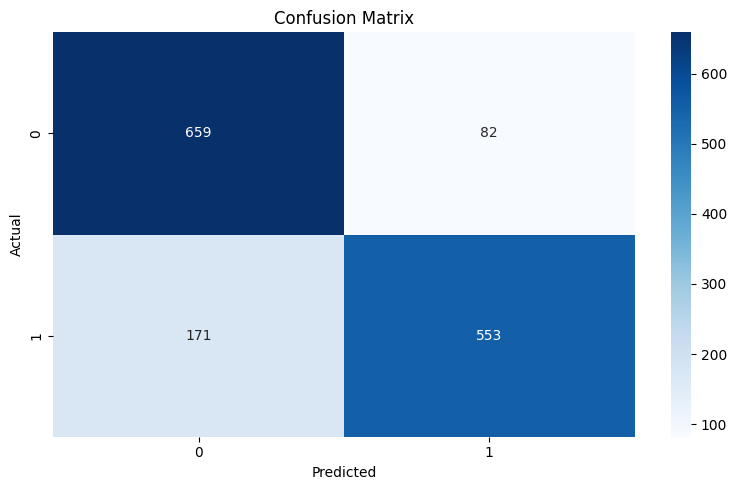

In [162]:
boosting_model = SimpleMultiClassBoosting(n_estimators=200)
boosting_model.fit(X_train, y_train)
boosting_metrics = evaluate_model(boosting_model, X_test, y_test)

Average Type  Precision   Recall  F1 Score  Accuracy
       Macro   0.886674 0.886674  0.886674  0.886689
       Micro   0.886689 0.886689  0.886689  0.886689
    Weighted   0.886689 0.886689  0.886689  0.886689
-------------------------------------------------------


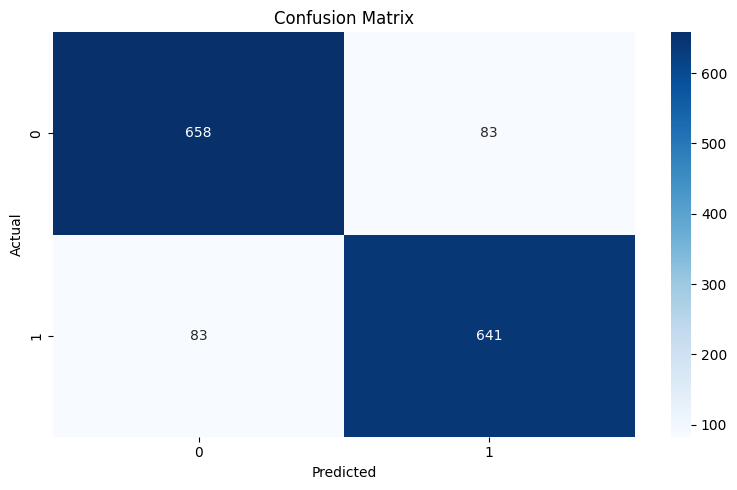

In [170]:
ada_boostscikit_learn_model  = AdaBoostClassifier(base_estimator=GaussianNB(),
    =n_estimators=200,
    learning_rate=0.01
)
ada_boostscikit_learn_model = ada_boostscikit_learn_model.fit(X_train, y_train)
ada_boost_scickit_learn_metrics = evaluate_model(ada_boostscikit_learn_model, X_test, y_test)